In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read the train and test dataset
train_data = pd.read_csv('big_sales_train.csv')
test_data = pd.read_csv('big_sales_test.csv')

In [10]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (8523, 12)

Shape of testing data : (5681, 11)


In [13]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [14]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Merging both the dataframes 

In [4]:
train_data['source']='train'
test_data['source']='test'
df=pd.concat([train_data,test_data],ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [17]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [18]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [19]:
df.shape

(14204, 13)

## Visualization for Data Distribution

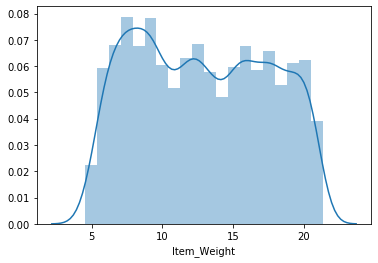

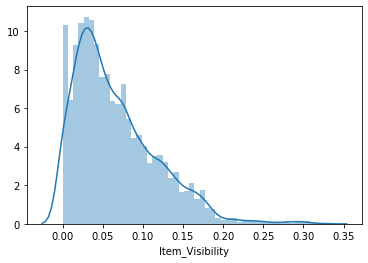

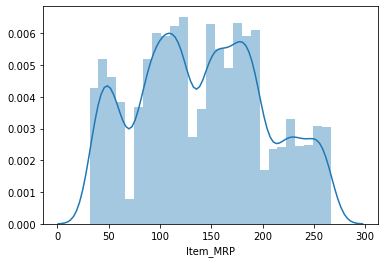

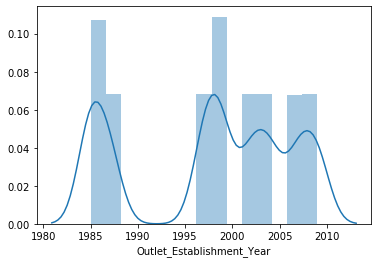

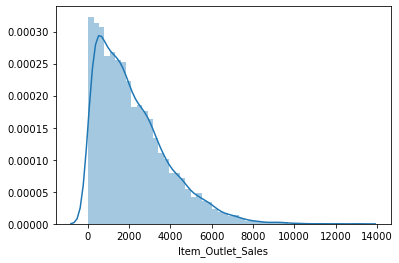

In [20]:
import seaborn as sns
for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

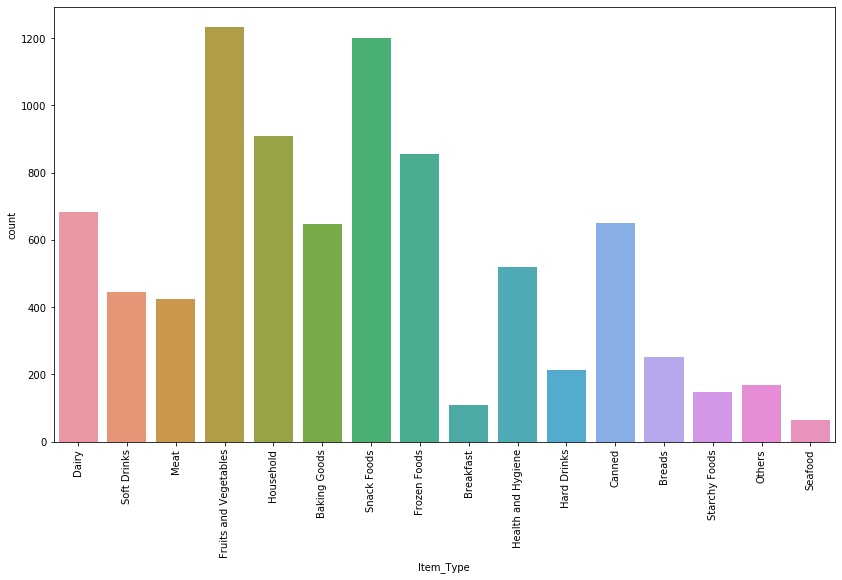

In [21]:
plt.figure(figsize=(14,8))
sns.countplot(train_data.Item_Type)
plt.xticks(rotation=90)

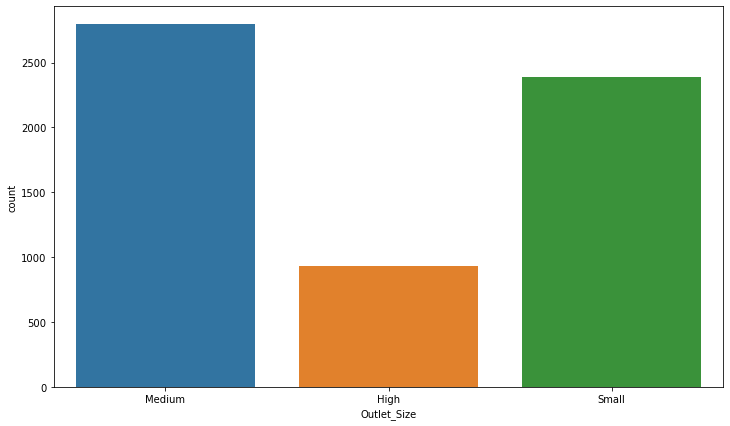

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(train_data.Outlet_Size)

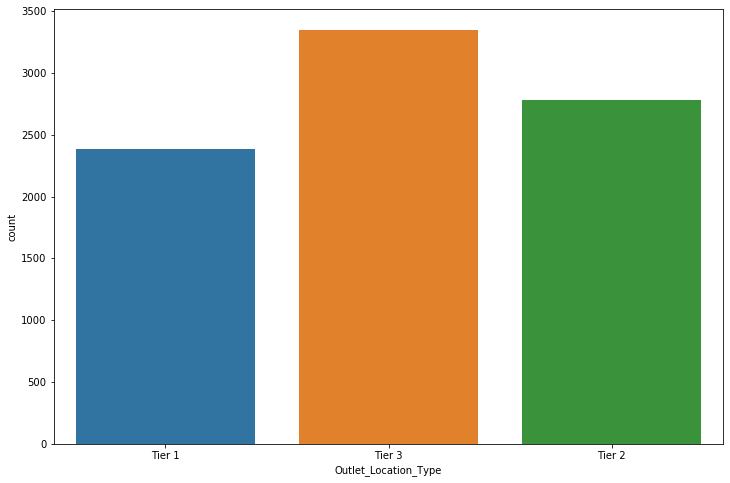

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(train_data.Outlet_Location_Type)

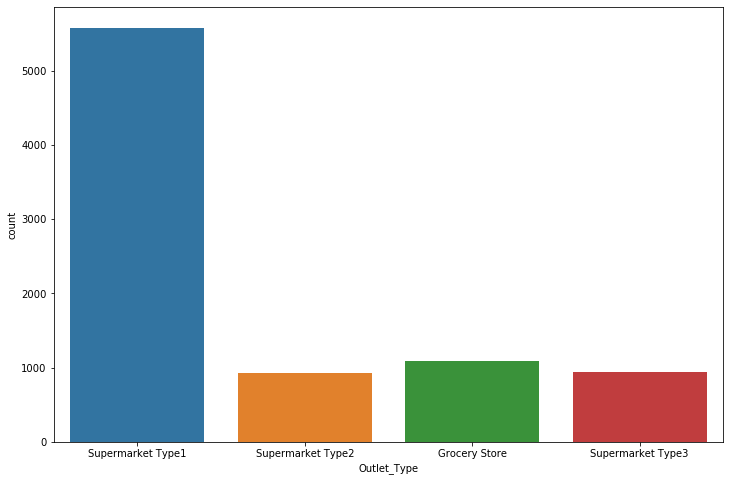

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(train_data.Outlet_Type)

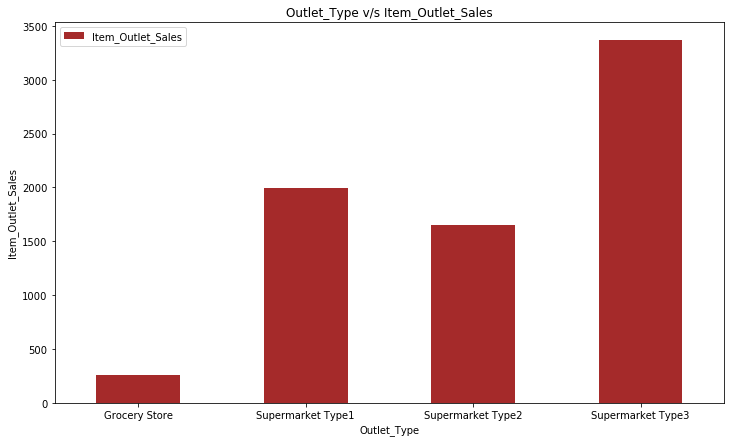

In [25]:
import numpy as np
outlet_type_pivot=train_data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)
outlet_type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Type v/s Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [26]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [5]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

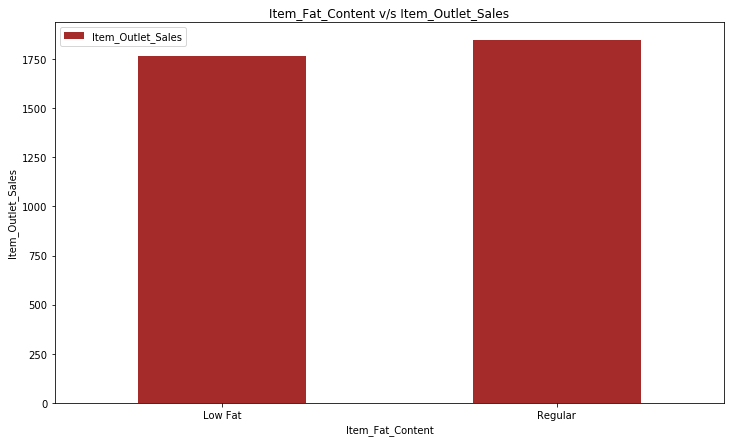

In [29]:
fat_content_pivot=train_data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
fat_content_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Fat_Content v/s Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [30]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


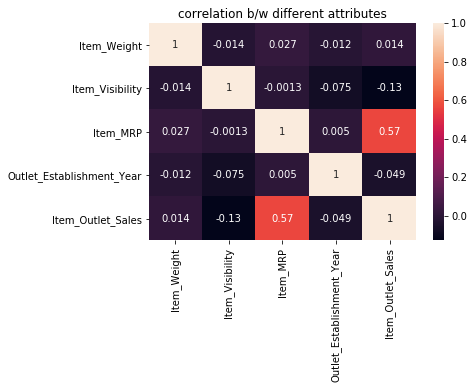

In [31]:
ax=sns.heatmap(train_data.corr(),annot=True)
plt.title("correlation b/w different attributes")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

# Feature Engineering

**Handling the Missing values**

In [32]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [7]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].value_counts().index[0],inplace=True)

In [34]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [35]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [8]:
#Replacing the Item_Visibility ith value as 0 to its median value

df['Item_Visibility'].replace(0.000000,np.nan,inplace=True) #first replace all 0 values with NaN

df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True) #then fill the NaN with median value

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.057851,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [38]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [10]:
#Creating a new column to store no. of years an outlet is old

df['Outlet_Years']=2009-df['Outlet_Establishment_Year']


In [11]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [41]:
# Item Type is either Food, Drink or Non-Consumable

df['Item_Identifier'].value_counts()

FDU45    10
FDT36    10
FDT51    10
FDR12    10
FDL58    10
         ..
FDM50     7
FDH58     7
DRN11     7
FDI46     7
FDL50     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [12]:
#labelling with 3 categories instead of 16 categories of Item_Type

df['New_Item_Type']=df['Item_Identifier'].apply(lambda x: x[0:2]) # taking first 2 characters
df['New_Item_Type']=df['New_Item_Type'].map({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})

df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

**If an item is non-consumable then why to associate a fat value to it?**

In [13]:
# label Non-Consumable as Non-Edible in Item_Fat_Content

df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64


**if an item is more visisble then its likely to get higher sales. Based on this hypothesis, generate a new column for average of visibility score.** 

In [14]:
item_vis_pivot=df.pivot_table(values='Item_Visibility', index='Item_Identifier')
item_vis_pivot


,Item_Visibility
Item_Identifier,
DRA12,0.047794
DRA24,0.045646
DRA59,0.139169
DRB01,0.086967
DRB13,0.013226
...,...
NCZ30,0.033087
NCZ41,0.063627
NCZ42,0.016800


In [15]:
function = lambda x: x['Item_Visibility']/item_vis_pivot['Item_Visibility'][item_vis_pivot.index == x['Item_Identifier']][0]
df['Item_Visibility_Avg']=df.apply(function,axis=1).astype(float)

#Determine another variable with means ratio
#df['Item_Visibility_MeanRatio'] = df.apply(lambda x: x['Item_Visibility']/item_vis_pivot[x['Item_Identifier']], axis=1)
#print data['Item_Visibility_MeanRatio'].describe()

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_Type,Item_Visibility_Avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.721104
3,FDX07,19.20,Regular,0.057851,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,1.884999
4,NCD19,8.93,Non-Edible,0.057851,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,1.990500


## Dealing with Categorical Variables

In [16]:
# Dummy Variables
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])
df.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
source                            object
Outlet_Years                       int64
Item_Visibility_Avg              float64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifier_OUT019           uint8
Outlet_Identifier_OUT027           uint8
Outlet_Identifier_OUT035           uint8
Outlet_Identifier_OUT045           uint8
Outlet_Identifier_OUT046           uint8
Outlet_Identifier_OUT049           uint8
Outlet_Size_High                   uint8
Outlet_Size_Medi

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,Item_Visibility_Avg,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,3735.1380,train,10,0.931078,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,443.4228,train,0,0.933420,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,2097.2700,train,10,0.721104,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.057851,Fruits and Vegetables,182.0950,1998,732.3800,train,11,1.884999,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.057851,Household,53.8614,1987,994.7052,train,22,1.990500,...,0,0,1,0,1,0,0,0,0,1


## Model Building 

In [18]:
df.drop(['Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)

In [19]:
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

In [20]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [21]:
train_x=train.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
train_y=train['Item_Outlet_Sales']
test_x=test.drop(['Item_Identifier'],axis=1).copy()

In [22]:
train_x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_Avg,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.30,0.016047,249.8092,10,0.931078,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,0,0.933420,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,10,0.721104,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.057851,182.0950,11,1.884999,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.057851,53.8614,22,1.990500,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1


In [54]:
train_y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [55]:
test_x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Visibility_Avg,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
8523,20.750000,0.007565,107.8622,10,0.549047,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
8524,8.300000,0.038428,87.3198,2,0.950585,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
8525,14.600000,0.099575,241.7538,11,1.560427,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
8526,7.315000,0.015388,155.0340,2,0.621248,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
8527,12.792854,0.118599,234.2300,24,0.917824,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
#predicting the train dataset to check accuracy
pred_y=model.predict(train_x)

In [30]:
pred_y

array([4060.66924558,  577.45512264, 2361.87642382, ..., 1513.77671884,
       1412.9403608 , 1220.8191215 ])

In [31]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(train_y,pred_y)

In [32]:
import math
print(mse)
print(math.sqrt(mse))

1270911.510713384
1127.347111901824


In [33]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=model,X=train_x,y=train_y,cv=10)
print(accuracy.mean())

0.5604665453722125


In [62]:
#prediction on test dataset
prediction=model.predict(test_x)
prediction

array([1828.71517502, 1575.18469566, 1879.15689023, ..., 1811.46247251,
       3528.25118643, 1267.25002608])

**Decision Tree Regressor**

In [63]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=20,min_samples_leaf=100)
tree.fit(train_x,train_y)
tree_pred=tree.predict(test_x)

In [64]:
tree_accuracy=cross_val_score(estimator=tree,X=train_x,y=train_y,cv=10)
print(tree_accuracy.mean())

0.5859953932543138


In [65]:
tree_pred

array([1661.69319608, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3877.31959   , 1240.36730761])

**Random Forest Regressor**

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(train_x,train_y)
rf_pred=tree.predict(test_x)
rf_pred

array([1661.69319608, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3877.31959   , 1240.36730761])

In [67]:
rf_accuracy=cross_val_score(estimator=rf,X=train_x,y=train_y,cv=10)
print(rf_accuracy.mean())

0.594485338744352


**XG Boost Regressor**

In [24]:
from xgboost import XGBRegressor

xg=XGBRegressor(n_estimators=1000,learning_rate=0.05)
xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [25]:
xg_pred=xg.predict(test_x)
xg_pred

array([1634.0524, 1393.8231,  646.3966, ..., 1806.503 , 3334.5554,
       1633.2908], dtype=float32)

In [26]:
#xg_accuracy=cross_val_score(estimator=xg,X=train_x,y=train_y,cv=10)

xg_accuracy=round(xg.score(train_x,train_y))
print(xg_accuracy)

1.0


**Conclusion**

For the proposed dataset, XGBoost gives the highest accuracy score.